<a href="https://colab.research.google.com/github/rayhan-ferdous/Tenplate/blob/main/s4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# print(training_images.shape, test_images.shape)

# print(training_images[0])

# bounding each value withing [ ] so that every matrix value is now a single object array
training_images=training_images.reshape(60000, 28, 28, 1)
# definitely, this code does not work
# training_images=training_images.reshape(60000, 28, 28, 2)

'''
a (x, y, z) shaped matrix
a 3D matrix as it has 3 elements

the outermost/1st dim has x elements
elements of the 1st dim or the 2nd dim has y elements each

then elements of the 2nd dim or the 3rd dim has z elements each
'''

training_images=training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

# print(training_images.shape, test_images.shape)
# print(training_images[0])

# this does not work now
# plt.imshow(training_images[0], cmap = 'gray')

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(training_images, training_labels, epochs=1)

test_loss = model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [3]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


[<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 1600) dtype=float32 (created by layer 'flatten')>, <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]


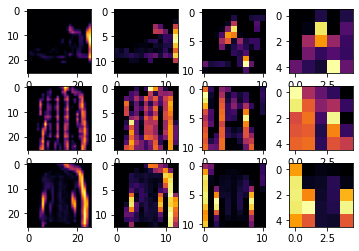

In [8]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26

# 0 to 63
CONVOLUTION_NUMBER = 45

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]

activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

print(layer_outputs)

for x in range(0,4):

  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)